# Carga de Librerias a utilizar

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
from helper import Funciones

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Lectura de datos

Los datos provienen de una base de datos hecha en mysql.Pero se tiene la opción de tomar los datos de la carpeta "DatasetCrudos".

In [4]:
fun= Funciones('conexion.env')

In [5]:

engine = fun.crear_conexion_mysql()
df_acceso_por_velocidad = pd.read_sql_table('internet_accesos_velocidad', con=engine)


In [6]:
df_acceso_por_velocidad.head(3)

,idTabla,año,trimestre,provincia,hasta512,De512_1mbps,De1_6mbps,De6_10mbps,De10_20mbps,De20_30mbps,mas30mbps,otros,total
0,1,2023,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042650.0,93351.0,5011620.0
1,2,2023,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355060.0,0.0,1474370.0
2,3,2023,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0


In [10]:
df_grouped = df_acceso_por_velocidad.groupby('año').sum().reset_index()

# Variables Numéricas

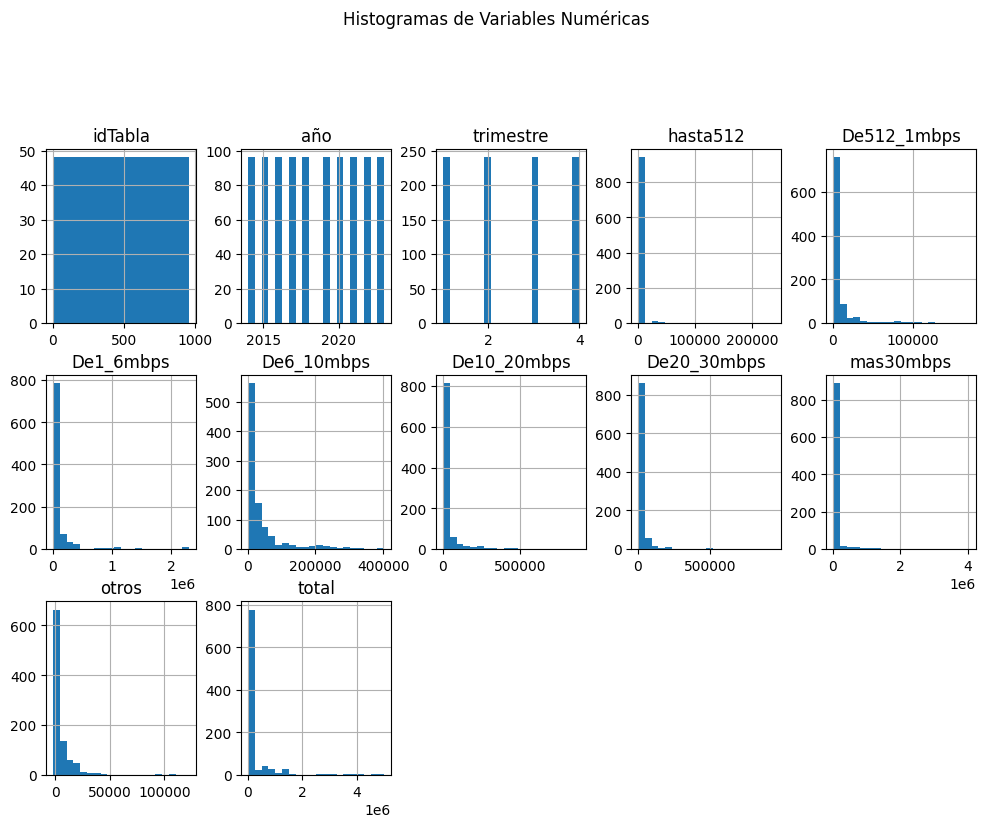

In [7]:
df_acceso_por_velocidad
df_acceso_por_velocidad.hist(bins=20, figsize=(12, 14), layout=(5, 5))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

# Variables Categóricas

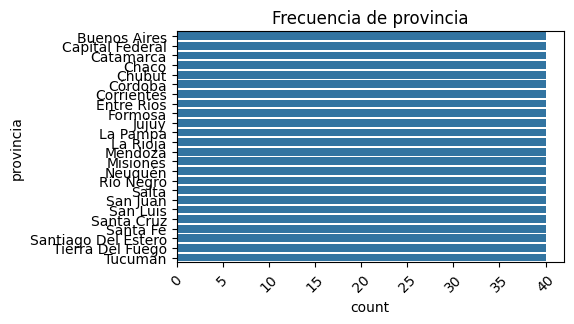

In [8]:
categorical_columns = df_acceso_por_velocidad.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(df_acceso_por_velocidad[col], order=df_acceso_por_velocidad[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=45)
    plt.show()

# Tendencia

En este punto decido ver la tendencia de las velocidades , cuál ha sido su tendencia a través de los años

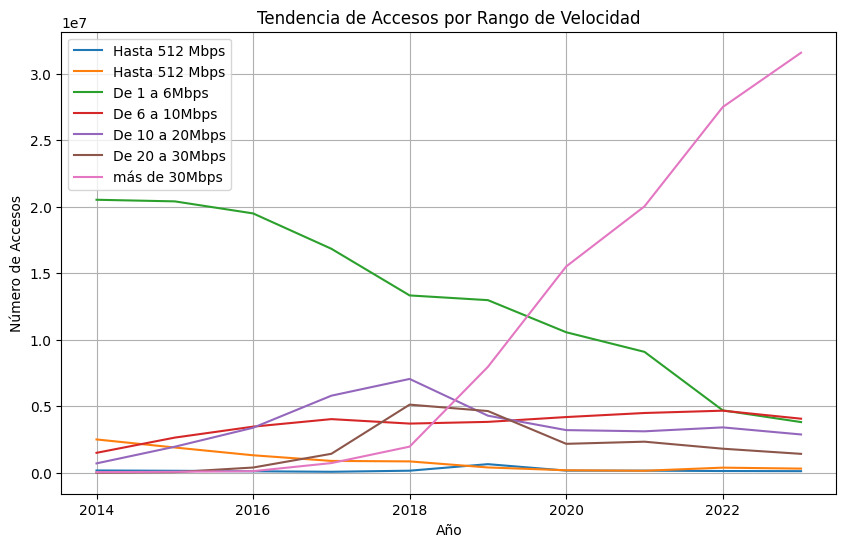

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['año'], df_grouped['hasta512'], label='Hasta 512 Mbps')
plt.plot(df_grouped['año'], df_grouped['De512_1mbps'], label='Hasta 512 Mbps')
plt.plot(df_grouped['año'], df_grouped['De1_6mbps'], label='De 1 a 6Mbps')
plt.plot(df_grouped['año'], df_grouped['De6_10mbps'], label='De 6 a 10Mbps')
plt.plot(df_grouped['año'], df_grouped['De10_20mbps'], label='De 10 a 20Mbps')
plt.plot(df_grouped['año'], df_grouped['De20_30mbps'], label='De 20 a 30Mbps')
plt.plot(df_grouped['año'], df_grouped['mas30mbps'], label='más de 30Mbps')
plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.title('Tendencia de Accesos por Rango de Velocidad')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

y encontramos que la velocidad que va en crecimiento es la de mas de 30 Mbps